# K-Plus Proches Voisins (K Nearest Neigbors)
## 1. Introduction
L’algorithme des k-PPV est l’un des algorithmes les plus utilisés en classification. Il est trivial, simple à implémenter et donne de bons résultats. Son principe est très simple ; pour un vecteurs caractéristique donné x, on cherche parmi les vecteurs d’entraînement les k vecteurs les plus proches de x, le vecteur x est alors affecté à la classe possédant plus de représentants parmi ces k plus proches.

## 2. Algorithme
1. Parmi les vecteurs d’exemples d’entrainement, en utilisant une distance comme la distance euclidienne, choisir un k impaire puis identifier les k-plus proches voisins du vecteur x.
2. Parmi ces k plus proches voisins, $𝑘_{𝑖}$ éléments appartient à la classe $𝐶_{𝑖}$.
3. x est affecté à la classe $C_{i}$ correspondante à la plus grande valeur $𝑘_{𝑖}$ .

- Dans le cas k=1, on parle du plus proche voisin, le vecteur x sera affecté à la classe
possédant l’élément le plus proche de x.

- Le choix d’un k plus grand a l’avantage de lisser les limites de décisions, mais en contrepartie, il représente une grande complexité dans les calculs.
La figure suivante illustre cet algorithme avec k=11. 
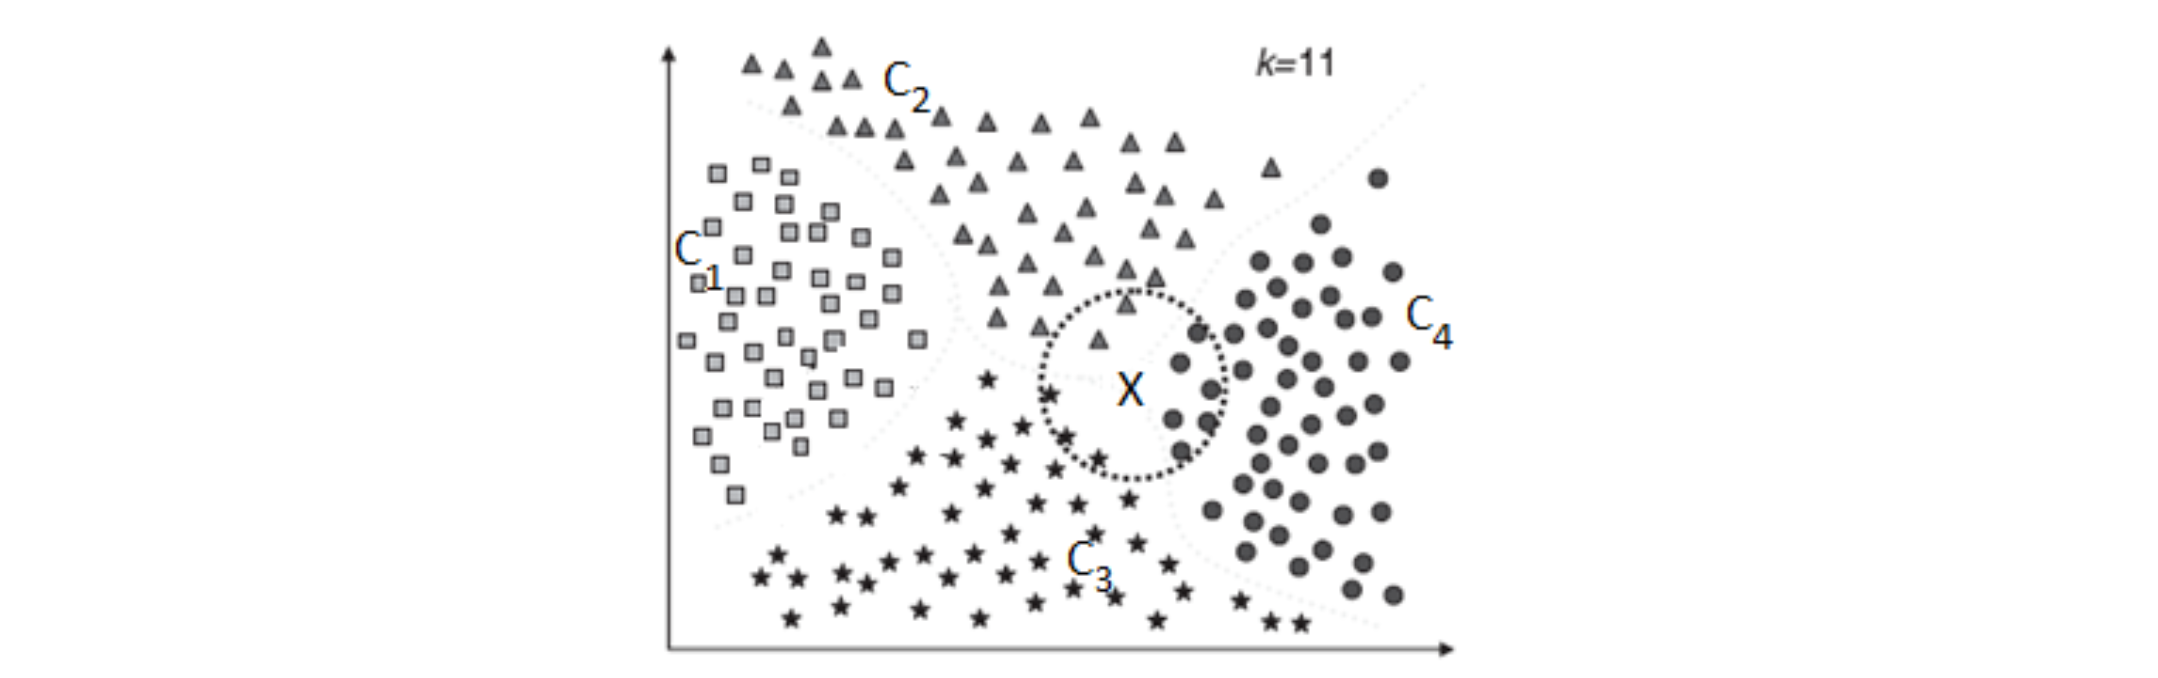

- Le vecteur inconnu x présenté au k plus proche voisins est affecté à la classe 1, car parmi les 11 plus proches, 6 appartiennent à la classe 𝐶4, 3 à la classe 𝐶3, 2 à la classe 𝐶2 et aucun n’appartient à la classe 𝐶1.

- Dans cet algorithme, on remarque l’absence d’une phase d’entraînement, car tous les calculs sont faits lors de la phase de classification ; le vecteurs x est comparé à la totalité des données d’entraînement.

## 3- Implémention de l'algorithme
Dans cet exemple nous allons implémentation le KNN sur l'ensemble de données **iris**. L'ensemble de données contient 50 échantillons pour chaque espèce de fleur d'iris (total de 150). 

Pour chaque échantillon, nous avons la longueur et la largeur des sépales, la longueur et la largeur des pétales et un nom d'espèce (classe/étiquette) (voir figure).
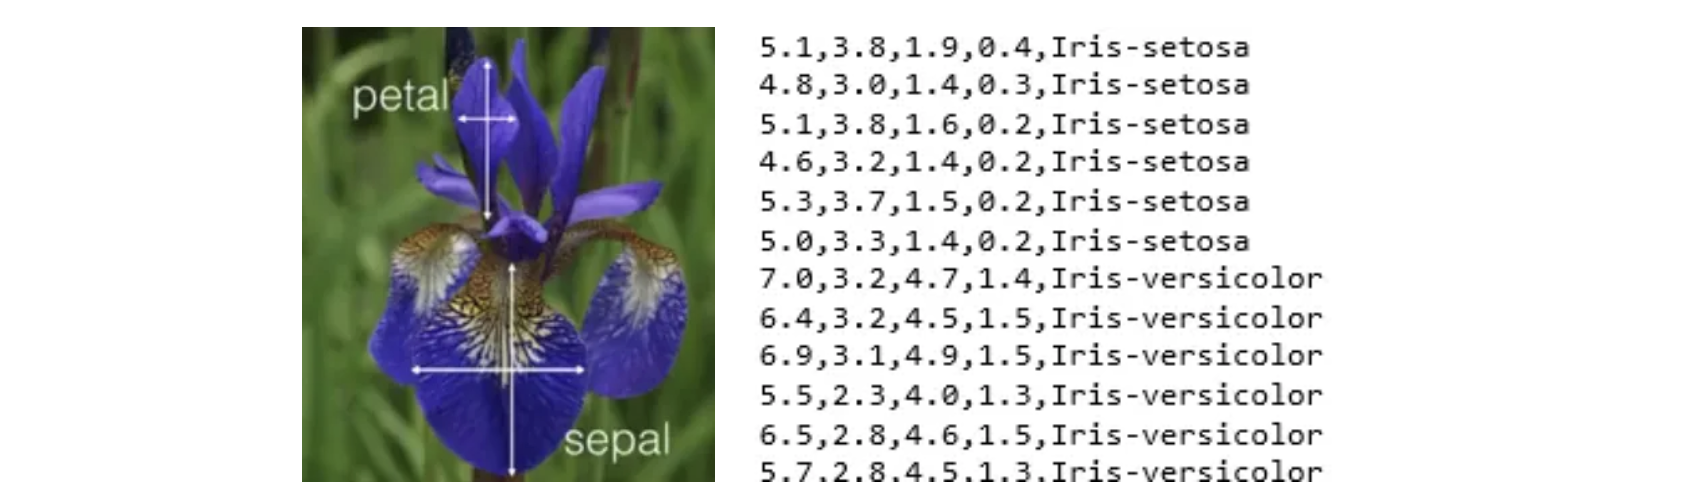

In [15]:
# Chargement des données
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris= load_iris()
X= iris.data
y= iris.target
print(X.shape, y.shape)
print(iris.feature_names)
print(iris.target_names)
print(set(y))

(150, 4) (150,)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
{0, 1, 2}


In [3]:
# 100 exemple pour l'entrainement et 50 pour le test
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
#1
#X=np.array([df['age'],df['emp_var_rate'],df['cons_conf_idx']]).T
#y=np.array([df['y']]).T

#2
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33)

#3
reg = LinearRegression().fit(X_train, y_train)


newX=np.random.shuffle(X)
newY=np.random.shuffle(y)


print(newX)





NameError: name 'X' is not defined

In [6]:
data=np.hstack((X,y.reshape(150,-1)))
np.random.shuffle(data)
train=data[:100]
test=data[100:]
X_train=train[:,:-1]
Y_train=train[:,-1]
X_test=test[:,:-1]
Y_test=test[:,-1]


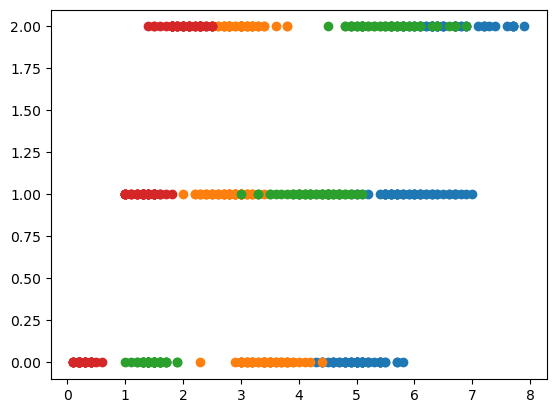

In [7]:
plt.scatter(data[:,0],data[:,-1])
plt.scatter(data[:,1],data[:,-1])
plt.scatter(data[:,2],data[:,-1])
plt.scatter(data[:,3],data[:,-1])

In [8]:
# Définir une fonction pour calculer la distance euclidienne
def dis_euc(a,b):
    return np.sqrt((a-b).dot(a-b))
    





In [9]:
# definir la fonction predict_one
# input : 
#       X_train 
#       y_train 
#       x : l'incunue
#       k : le nombre de voisins
# Output : la classe de x 
import statistics as st
def predict_one(X_train,Y_train,x,k):
    d=[]
    for elem in X_train:
        d.append(dis_euc(elem,x))
    d=np.array(d)
    idx=d.argsort()[:k]
    return Y_train[st.mode(idx)]

predict_one(X_train,Y_train,X_test[0],5)
    
    






1.0

In [10]:
# definir la fonction predict
# input : 
#       X_train (m1,n)
#       y_train (m1,1)
#       X_test : l'ensemble des exemples de test  (m2,n)
#       k : le nombre de voisins 
# Output : les classes de X_test
def predict(X_train,Y_train,X_test,k):
    out=[]
    for x in X_test:
        out.append(predict_one(X_train,Y_train,x,k))
    return np.array(out)

Une autre méthode sur ce lien https://www.askpython.com/python/examples/k-nearest-neighbors-from-scratch

## 4. Evaluation d'un modèle de classification
Beaucoup de temps, on essaie d'augmenter l'évaluation de nos modèles sur la précision. Mais voulons-nous vraiment la précision comme mesure de la performance de notre modèle ?
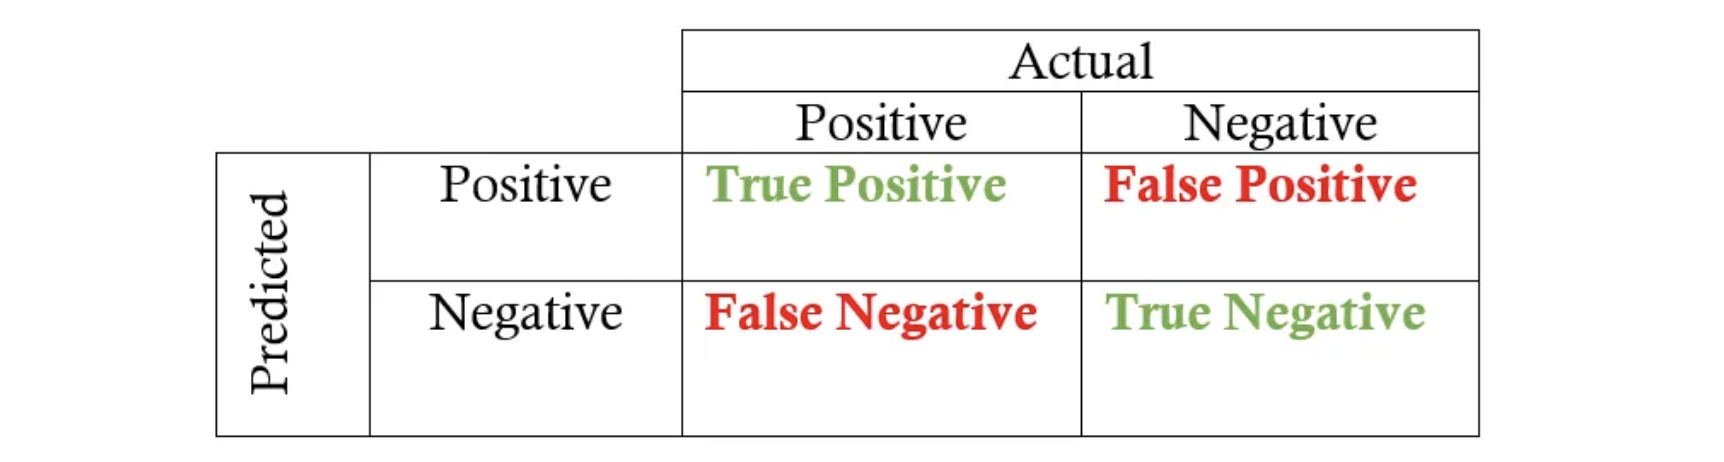

In [35]:
# calculer le taux de  de ce modèle
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred=predict(X_train,Y_train,X_test,5)
confusion_matrix(y_pred,Y_test)

array([[13,  0,  0],
       [ 0, 22,  0],
       [ 0,  1, 14]])

- Accuracy = (TP+TN)/(TP+FP+FN+TN)

La précision est un choix valable d'évaluation pour les problèmes de classification qui sont bien équilibrés.
- Precision = (TP)/(TP+FP)

La précision est un choix valable lorsque nous voulons être très sûrs de notre prédiction
- Recall = (TP)/(TP+FN)

Le rappel est un choix valable lorsque nous voulons capturer autant de points positifs que possible

In [14]:
TP=sum(np.logical_and(Y_test==1,y_pred==1))
TN=sum(np.logical_and(Y_test==0,y_pred==0))
FP=sum(np.logical_and(Y_test!=1,y_pred!=1))
FN=sum(np.logical_and(Y_test!=0,y_pred!=0))
accuracy=(𝑇𝑃+𝑇𝑁)/(𝑇𝑃+𝑇𝑁+𝐹𝑃+𝐹𝑁)
TP

22

In [ ]:
def con_matrix():
    